In [1]:
%autosave 0

Autosave disabled


# 8. Neural networks and deep learning

This week, we'll learn about neural nets and build a model
for classifying images of clothes. 

For this we will use the libraries `tensorflow` and `keras`. Note that we only have to install them, when working locally, as they are already set up with Saturn Cloud.

In [2]:
# install tensorflow library
# !pip install tensorflow

## 8.1 Fashion classification

Dataset: 

* Full: https://github.com/alexeygrigorev/clothing-dataset
* Small: https://github.com/alexeygrigorev/clothing-dataset-small

Link to learn more about ho Neural Networks work:

* https://cs231n.github.io/

Let's download the dataset:

In [3]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439 (from 1)
Receiving objects: 100% (3839/3839), 100.58 MiB | 61.23 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [4]:
# Import for matrices and plots
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
# Import tensorflow and keras for images
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

2024-12-19 17:52:52.586555: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-19 17:52:52.603738: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734630772.623904     870 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734630772.629996     870 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-19 17:52:52.650012: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [6]:
# load models and functions to process data and classify images
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [7]:
# import function to extract images for datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## 8.2 TensorFlow and Keras


Let's load an image:

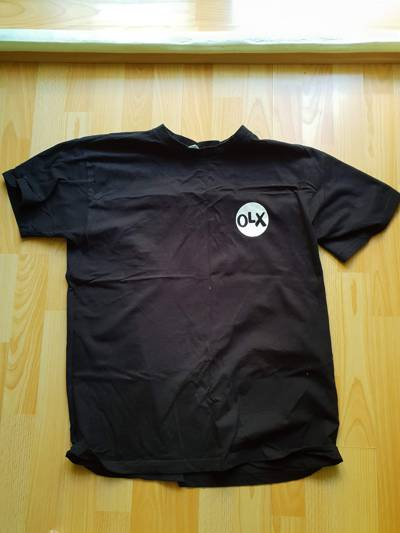

In [8]:
# Path of the folder containing the image
path = './clothing-dataset-small/train/t-shirt'
# Name of the image
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
# Image path
fullname = f'{path}/{name}'
# Load the image
load_img(fullname)

In [9]:
# Reshape the image during loading
img = load_img(fullname, target_size = (299, 299))

# Convert image to numpy array
x = np.array(img)
# Shape of the image as array
x.shape

(299, 299, 3)

In [10]:
# Visualize the image representation
x

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 254, 247]],

       [[188, 179, 112],
        [187, 178, 111],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 191, 126],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  25],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]

`[179, 171,  99]` is a pixel with `RGB` values (`179`--> `R`, `171`--> `G`, `99`--> `B`).

## 8.3 Pre-trained convolutional neural networks

* Imagenet dataset: https://www.image-net.org/
* Pre-trained models: https://keras.io/api/applications/


In [11]:
# Load Xception model
model = Xception(weights = 'imagenet', input_shape = (299, 299, 3))

I0000 00:00:1734630780.552412     870 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:1e.0, compute capability: 7.5


In [12]:
# Wrap the image array in another array of images get a list/batch of image arrays
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [13]:
# Preprocess the input batch
X = preprocess_input(X)

# Make prediction
pred = model.predict(X)

I0000 00:00:1734630783.969070     959 service.cc:148] XLA service 0x7f6fa40046a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734630783.969101     959 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-12-19 17:53:04.005192: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1734630784.337072     959 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-19 17:53:05.482655: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


I0000 00:00:1734630786.330154     959 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [14]:
# Shape of the predictions
pred.shape

(1, 1000)

We made predictions for only one image with respect to `1000` classes.

In [15]:
# decode predictions to get predicted probabilities with classes
decode_predictions(pred)

[[('n03595614', 'jersey', np.float32(0.6819637)),
  ('n02916936', 'bulletproof_vest', np.float32(0.038139876)),
  ('n04370456', 'sweatshirt', np.float32(0.03432471)),
  ('n03710637', 'maillot', np.float32(0.011354204)),
  ('n04525038', 'velvet', np.float32(0.0018453564))]]

## 8.4 Convolutional neural networks

* Types of layers: convolutional and dense 
* Convolutional layers and filters
* Dense layers

There are more layers. Read here: https://cs231n.github.io/

## 8.5 Transfer learning

* Reading data with `ImageDataGenerator`
* Train `Xception` on smaller images (150x150)

(Better to run it with a GPU)

In [16]:
# Initialize training image data generator
train_gen = ImageDataGenerator(preprocessing_function = preprocess_input) # preprocess function fo Xception

# Training data set
train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size = (150, 150), # image size for our model
    batch_size = 32 
)

Found 3068 images belonging to 10 classes.


In [17]:
# Get folder names in the train dataset
!ls -l clothing-dataset-small/train

total 284
drwxr-sr-x 2 jovyan jovyan 20480 Dec 19 17:52 dress
drwxr-sr-x 2 jovyan jovyan 12288 Dec 19 17:52 hat
drwxr-sr-x 2 jovyan jovyan 36864 Dec 19 17:52 longsleeve
drwxr-sr-x 2 jovyan jovyan 16384 Dec 19 17:52 outwear
drwxr-sr-x 2 jovyan jovyan 36864 Dec 19 17:52 pants
drwxr-sr-x 2 jovyan jovyan 20480 Dec 19 17:52 shirt
drwxr-sr-x 2 jovyan jovyan 20480 Dec 19 17:52 shoes
drwxr-sr-x 2 jovyan jovyan 20480 Dec 19 17:52 shorts
drwxr-sr-x 2 jovyan jovyan 12288 Dec 19 17:52 skirt
drwxr-sr-x 2 jovyan jovyan 65536 Dec 19 17:52 t-shirt


In [18]:
# Get classes names
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

Note that folder names are the same as classes names for the structured `train_ds` generated.

In [19]:
# Get a batch features and labels
X, y = next(train_ds)

In [20]:
# Targets for the 5 first images
y[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

**Targets** are **one-hot-encoded**, with a `1` in the corresponding label column.

In [21]:
# Initialize validation image data generator
val_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size = (150, 150),
    batch_size = 32,
    shuffle = False # we don't need to shuffle it as it is only for evaluating the model
)

Found 341 images belonging to 10 classes.


In [22]:
# Model initialization
base_model = Xception(
    weights = 'imagenet',
    include_top = False, # to avoid including the dense layers
    input_shape = (150, 150, 3) # input image size 
)
# Make sure the weights won't be updated
base_model.trainable = False

# Specify the inputs (part of the model that receives the images)
inputs = keras.Input(shape = (150, 150, 3))

# Apply the base model to inputs to get base
base = base_model(inputs, training = False)

# Average Pooling layer to reduce the dimensionality
vectors = keras.layers.GlobalAveragePooling2D()(base)

# Dense layers for the output
outputs = keras.layers.Dense(10)(vectors)

# model
model = keras.Model(inputs, outputs)

In [23]:
# Set the learning rate
learning_rate = 0.01
# Set the optimizer
optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
# Set the loss function
loss = keras.losses.CategoricalCrossentropy(from_logits = True)

# Compile everything in our model, setting optimizer, loss, and metric's evaluation
model.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])

In [24]:
# Model training
history = model.fit(train_ds, epochs = 10, validation_data = val_ds)

Epoch 1/10


/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 24s 167ms/step - accuracy: 0.5689 - loss: 1.5662 - val_accuracy: 0.7537 - val_loss: 0.8643
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.8175 - loss: 0.5875 - val_accuracy: 0.7889 - val_loss: 0.9938
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.8895 - loss: 0.3381 - val_accuracy: 0.7654 - val_loss: 0.9281
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.9238 - loss: 0.2005 - val_accuracy: 0.8182 - val_loss: 0.7710
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9428 - loss: 0.1646 - val_accuracy: 0.7889 - val_loss: 0.9194
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.9631 - loss: 0.1023 - val_accuracy: 0.7771 - val_loss: 1.0360
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.9601 - loss: 0.1347 - val_accuracy: 0.8240 - val_loss: 0.9256
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9790 - loss: 0.0602 - val_accuracy: 0.8094 - val_loss: 

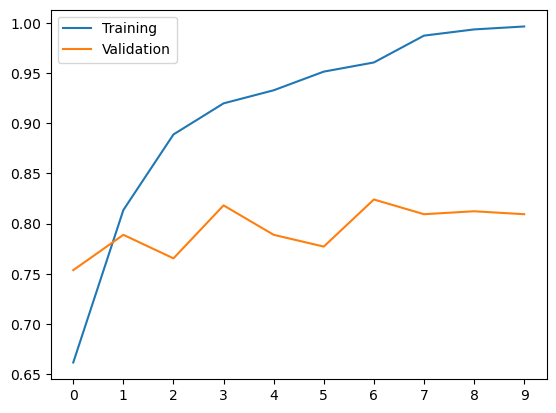

In [25]:
# Cross validation curves
plt.plot(history.history['accuracy'], label = 'Training')
plt.plot(history.history['val_accuracy'], label = 'Validation')
plt.xticks(np.arange(10))
plt.legend();

Note that our model is clearly overfitting.

## 8.6 Adjusting the learning rate

* What's the learning rate
* Trying different values

In [26]:
# Make a function to create a CNN
def make_model(learning_rate = 0.01):
    # Initialize Xception model
    base_model = Xception(
        weights = 'imagenet',
        include_top = False,
        input_shape = (150, 150, 3)
    )
    # Frozen model's weights
    base_model.trainable = False

    #########################################

    # Specify the inputs (part of the model that receives the images)
    inputs = keras.Input(shape = (150, 150, 3))
    # Apply the base model to inputs to get base
    base = base_model(inputs, training = False)
    # Average Pooling layer to reduce the dimensionality
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    # Dense layers for the output
    outputs = keras.layers.Dense(10)(vectors)
    # model
    model = keras.Model(inputs, outputs)

    #########################################
    # Set the optimizer
    optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
    # Set the loss function
    loss = keras.losses.CategoricalCrossentropy(from_logits = True)
    
    # Compile everything in our model, setting optimizer, loss, and metric's evaluation
    model.compile(
        optimizer = optimizer,
        loss = loss,
        metrics = ['accuracy']
    )

    # return model
    return model

In [27]:
# Initialize scores
scores = {}

# Fine-tuning learning rate
for lr in [0.0001, 0.001, 0.01, 0.1]:
    # learning rate
    print(lr)

    # Model building
    model = make_model(learning_rate = lr)
    # Model training
    history = model.fit(train_ds, epochs = 10, validation_data = val_ds)
    # Store scores
    scores[lr] = history.history

    # Space for better visualization
    print()
    print()

0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 115ms/step - accuracy: 0.2409 - loss: 2.1993 - val_accuracy: 0.5132 - val_loss: 1.5934
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.5485 - loss: 1.4786 - val_accuracy: 0.5982 - val_loss: 1.2441
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.6187 - loss: 1.1801 - val_accuracy: 0.6510 - val_loss: 1.0685
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.6809 - loss: 1.0251 - val_accuracy: 0.7097 - val_loss: 0.9559
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.7106 - loss: 0.9163 - val_accuracy: 0.7419 - val_loss: 0.8845
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.7303 - loss: 0.8535 - val_accuracy: 0.7507 - val_loss: 0.8318
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.7478 - loss: 0.7720 - val_accuracy: 0.7566 - val_loss: 0.7898
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.7625 - loss: 0.7403 - val_accuracy: 0

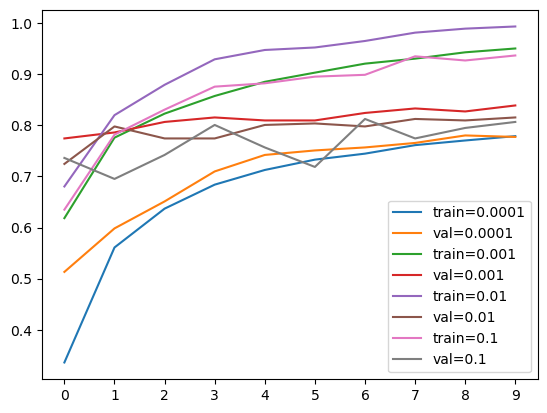

In [28]:
# Cross Validation curves for learning rates
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label = ('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label = ('val=%s' % lr))

# Ticks and legend
plt.xticks(np.arange(10))
plt.legend();

Note that the learning parameters values `0.1` and `0.0001` give the lowest validation scores. Let's delete them to get a better or lighter visualization of the cross validation curves.

In [29]:
# Delete learning rates from scores dataframes
del scores[0.1]
del scores[0.0001]

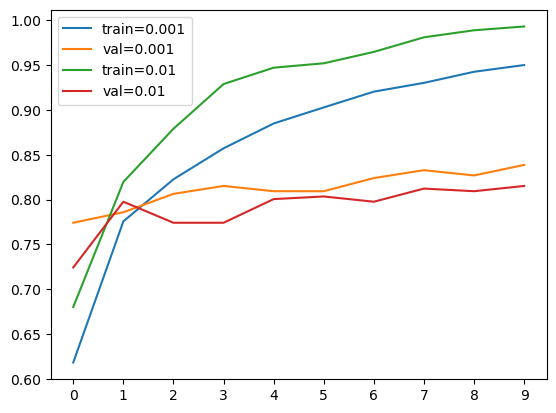

In [30]:
# Cross Validation curves for learning rates
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label = ('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label = ('val=%s' % lr))

# Ticks and legend
plt.xticks(np.arange(10))
plt.legend();

The best learning parameter is `0.001` as the other one shows overfitting with worse validation score and better training score.

In [31]:
# Set optimila learning rate
learning_rate = 0.001

## 8.7 Checkpointing

* Saving the best model only
* Training a model with callbacks

In [32]:
# Save the model weights to a file
model.save('model_v1.keras')

In [33]:
# Save best model with checkpoints
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only = True, # save the model each time it improves
    monitor = 'val_accuracy',
    mode = 'max'
)

In [34]:
# Set the learning rate
learning_rate = 0.001

# Build model
model = make_model(learning_rate = learning_rate)

# Model training
history = model.fit(
    train_ds,
    epochs = 10,
    validation_data = val_ds,
    callbacks = [checkpoint]
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 120ms/step - accuracy: 0.5143 - loss: 1.4551 - val_accuracy: 0.7830 - val_loss: 0.7099
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.7795 - loss: 0.6286 - val_accuracy: 0.7947 - val_loss: 0.6378
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.8321 - loss: 0.5099 - val_accuracy: 0.8035 - val_loss: 0.5953
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8656 - loss: 0.4234 - val_accuracy: 0.7977 - val_loss: 0.5962
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.8932 - loss: 0.3543 - val_accuracy: 0.8094 - val_loss: 0.5579
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.9123 - loss: 0.3148 - val_accuracy: 0.8270 - val_loss: 0.5400
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.9289 - loss: 0.2727 - val_accuracy: 0.8211 - val_loss: 0.5406
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.9420 - loss: 0.2479 - val_accuracy: 0.8240 -

## 8.8 Adding more layers


* Adding one inner dense layer
* Experimenting with different sizes of inner layer

In [35]:
# Make a function to create a CNN
def make_model(learning_rate = 0.01, size_inner = 100):
    # Initialize Xception model
    base_model = Xception(
        weights = 'imagenet',
        include_top = False,
        input_shape = (150, 150, 3)
    )
    # Frozen model's weights
    base_model.trainable = False

    #########################################

    # Specify the inputs (part of the model that receives the images)
    inputs = keras.Input(shape = (150, 150, 3))
    # Apply the base model to inputs to get base
    base = base_model(inputs, training = False)
    # Average Pooling layer to reduce the dimensionality
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    # Add an inner layer
    inner = keras.layers.Dense(size_inner, activation = 'relu')(vectors)
    # Dense layers for the output
    outputs = keras.layers.Dense(10)(inner)
    # model
    model = keras.Model(inputs, outputs)

    #########################################
    # Set the optimizer
    optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
    # Set the loss function
    loss = keras.losses.CategoricalCrossentropy(from_logits = True)
    
    # Compile everything in our model, setting optimizer, loss, and metric's evaluation
    model.compile(
        optimizer = optimizer,
        loss = loss,
        metrics = ['accuracy']
    )

    # return model
    return model

In [36]:
# Set the learning rate
learning_rate = 0.001
# Initialize scores
scores = {}

# Fine-tuning the size of the inner layer
for size in [10, 100, 1000]:
    # Inner layer size
    print(size)

    # Model building
    model = make_model(learning_rate = learning_rate, size_inner = size)
    # Model training
    history = model.fit(train_ds, epochs = 10, validation_data = val_ds)
    # Store scores
    scores[size] = history.history

    # Space for better visualization
    print()
    print()

10
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 126ms/step - accuracy: 0.2742 - loss: 1.9603 - val_accuracy: 0.5220 - val_loss: 1.3795
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.5993 - loss: 1.2207 - val_accuracy: 0.6598 - val_loss: 1.0249
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.6857 - loss: 0.8841 - val_accuracy: 0.7243 - val_loss: 0.7924
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.7720 - loss: 0.6272 - val_accuracy: 0.7625 - val_loss: 0.6918
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.8174 - loss: 0.5475 - val_accuracy: 0.7859 - val_loss: 0.6677
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.8620 - loss: 0.4463 - val_accuracy: 0.7771 - val_loss: 0.6222
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.8885 - loss: 0.3672 - val_accuracy: 0.7918 - val_loss: 0.6068
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9068 - loss: 0.3275 - val_accuracy: 0.791

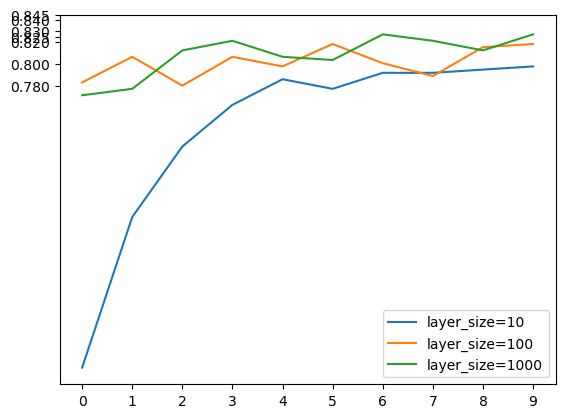

In [37]:
# For each possible size of inner layer and its scores
for size, hist in scores.items():
    # Plot validation curves
    plt.plot(hist['val_accuracy'], label = ('layer_size=%s' % size))

# Ticks and legend
plt.xticks(np.arange(10))
plt.yticks([0.78, 0.8, 0.82, 0.825, 0.83, 0.84, 0.845])
plt.legend();

There is some difficulty to distinguish between the result adding an inner layer of 100 nodes and one of 1000 nodes. We can go for the one wih 100 nodes for less complexity.

## 8.9 Regularization and dropout

* Regularizing by freezing a part of the network
* Adding dropout to our model
* Experimenting with different values

In [38]:
# Make a function to create a CNN
def make_model(learning_rate = 0.01, size_inner = 100, droprate = 0.5):
    # Initialize Xception model
    base_model = Xception(
        weights = 'imagenet',
        include_top = False,
        input_shape = (150, 150, 3)
    )
    # Frozen model's weights
    base_model.trainable = False

    #########################################

    # Specify the inputs (part of the model that receives the images)
    inputs = keras.Input(shape = (150, 150, 3))
    # Apply the base model to inputs to get base
    base = base_model(inputs, training = False)
    # Average Pooling layer to reduce the dimensionality
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    # Add an inner layer
    inner = keras.layers.Dense(size_inner, activation = 'relu')(vectors)
    # Add dropout
    drop = keras.layers.Dropout(droprate)(inner)
    # Dense layers for the output
    outputs = keras.layers.Dense(10)(drop)
    # model
    model = keras.Model(inputs, outputs)

    #########################################
    # Set the optimizer
    optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
    # Set the loss function
    loss = keras.losses.CategoricalCrossentropy(from_logits = True)
    
    # Compile everything in our model, setting optimizer, loss, and metric's evaluation
    model.compile(
        optimizer = optimizer,
        loss = loss,
        metrics = ['accuracy']
    )

    # return model
    return model

In [39]:
# Set the learning rate
learning_rate = 0.001
# Set inner layer size
size = 100
# Initialize scores
scores = {}

# Fine-tuning the drop rate
for droprate in [0.0, 0.2, 0.5, 0.8]:
    # drop rate
    print(droprate)

    # Model building
    model = make_model(
        learning_rate = learning_rate,
        size_inner = size,
        droprate = droprate
    )

    # Model training
    history = model.fit(train_ds, epochs = 30, validation_data = val_ds)
    # Store scores
    scores[droprate] = history.history

    # Space for better visualization
    print()
    print()

0.0
Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 122ms/step - accuracy: 0.5873 - loss: 1.2788 - val_accuracy: 0.7507 - val_loss: 0.7510
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.8183 - loss: 0.5255 - val_accuracy: 0.7889 - val_loss: 0.6341
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.8678 - loss: 0.3786 - val_accuracy: 0.7830 - val_loss: 0.6253
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9157 - loss: 0.2714 - val_accuracy: 0.7830 - val_loss: 0.6658
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.9480 - loss: 0.1964 - val_accuracy: 0.7977 - val_loss: 0.6332
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.9741 - loss: 0.1289 - val_accuracy: 0.8094 - val_loss: 0.6028
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9862 - loss: 0.0859 - val_accuracy: 0.8358 - val_loss: 0.5968
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9896 - loss: 0.0679 - val_accuracy: 0.81

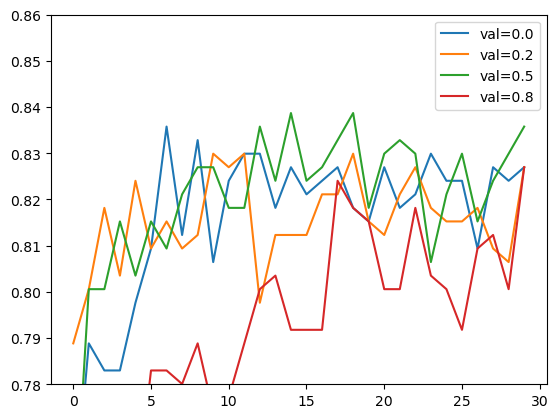

In [40]:
# For each droprate and its scores
for droprate, hist in scores.items():
    # Plot validation curve
    plt.plot(hist['val_accuracy'], label = ('val=%s' % droprate))
    
# For a better visualization
plt.ylim(0.78, 0.86)
plt.legend();

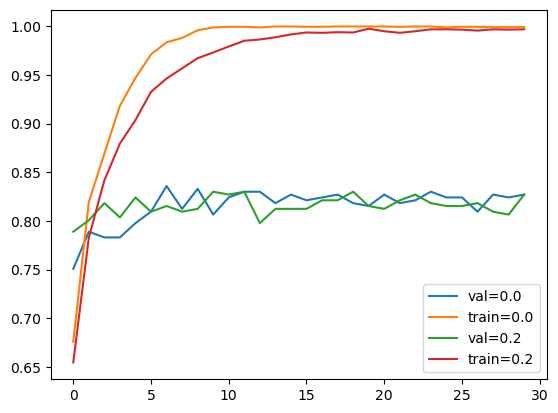

In [41]:
# Scores without dropout
hist = scores[0.0]
# Cross validation curves
plt.plot(hist['val_accuracy'], label = ('val=%s' % 0.0))
plt.plot(hist['accuracy'], label = ('train=%s' % 0.0))

# Scores with dropout of 0.2
hist = scores[0.2]
# Cross validation curves
plt.plot(hist['val_accuracy'], label = ('val=%s' % 0.2))
plt.plot(hist['accuracy'], label = ('train=%s' % 0.2))

# legend
plt.legend();

We will choose the dropout of `0.2` as the validation scores are similar and the training ones looks smaller (less overfitting).

## 8.10 Data augmentation

* Different data augmentations
* Training a model with augmentations
* How to select data augmentations?

In [42]:
# Initialize training data generator
train_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input #,
    # rotation_range = 30, --> rotation between -30 and 30
    # width_shift_range = 10.0, --> width shift range between -10 to 10 %
    # height_shift_range = 10.0, --> height shift range between -10 to 10 %
    # shear_range = 10.0,
    # zoom_range = 0.9, 
    # cval = 0.0,
    # horizontal_flip = False,
    # vertical_flip = True
)

# Extract training images
train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size = (150, 150),
    batch_size = 32
)

# Initialize validation data generator
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Extract validation images
val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size = (150, 150),
    batch_size = 32,
    shuffle = False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [43]:
# Set the learning rate
learning_rate = 0.001
# Set the inner layer size
size = 100
# Set the dropout rate
droprate = 0.2

# Build the model
model = make_model(
    learning_rate = learning_rate,
    size_inner = size,
    droprate = droprate
)

# Model training
history = model.fit(train_ds, epochs = 50, validation_data = val_ds)

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 121ms/step - accuracy: 0.5561 - loss: 1.3297 - val_accuracy: 0.8006 - val_loss: 0.6555
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.8009 - loss: 0.5949 - val_accuracy: 0.7859 - val_loss: 0.6252
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.8337 - loss: 0.4717 - val_accuracy: 0.8065 - val_loss: 0.5546
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.8947 - loss: 0.3226 - val_accuracy: 0.8240 - val_loss: 0.5202
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.9229 - loss: 0.2510 - val_accuracy: 0.8446 - val_loss: 0.5155
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.9500 - loss: 0.1821 - val_accuracy: 0.8299 - val_loss: 0.5324
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9499 - loss: 0.1798 - val_accuracy: 0.8387 - val_loss: 0.5251
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.9669 - loss: 0.1249 - val_accuracy: 0.8299 -

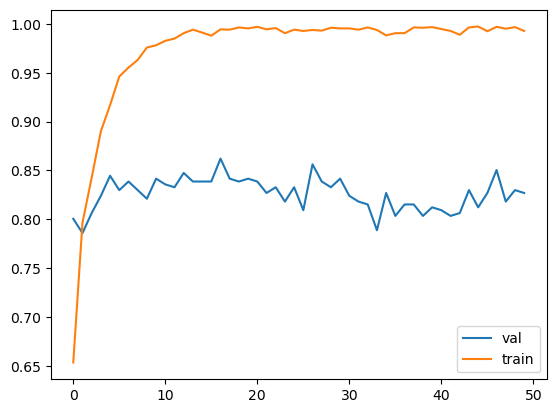

In [44]:
# Get scores
hist = history.history
# Validation curve
plt.plot(hist['val_accuracy'], label = 'val')
# Training curve
plt.plot(hist['accuracy'], label = 'train')

# legend
plt.legend();

## 8.11 Training a larger model

* Train a 299x299 model

In [45]:
# Make a function to create a CNN
def make_model(input_size = 150, learning_rate = 0.01, size_inner = 100, droprate = 0.5):
    # Initialize Xception model
    base_model = Xception(
        weights = 'imagenet',
        include_top = False,
        input_shape = (input_size, input_size, 3)
    )
    # Frozen model's weights
    base_model.trainable = False

    #########################################

    # Specify the inputs (part of the model that receives the images)
    inputs = keras.Input(shape = (input_size, input_size, 3))
    # Apply the base model to inputs to get base
    base = base_model(inputs, training = False)
    # Average Pooling layer to reduce the dimensionality
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    # Add an inner layer
    inner = keras.layers.Dense(size_inner, activation = 'relu')(vectors)
    # Add dropout
    drop = keras.layers.Dropout(droprate)(inner)
    # Dense layers for the output
    outputs = keras.layers.Dense(10)(drop)
    # model
    model = keras.Model(inputs, outputs)

    #########################################
    # Set the optimizer
    optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
    # Set the loss function
    loss = keras.losses.CategoricalCrossentropy(from_logits = True)
    
    # Compile everything in our model, setting optimizer, loss, and metric's evaluation
    model.compile(
        optimizer = optimizer,
        loss = loss,
        metrics = ['accuracy']
    )

    # return model
    return model

In [46]:
# Set input image size
input_size = 299

In [47]:
# Initialize training data generator
train_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    shear_range = 10,
    zoom_range = 0.1,
    horizontal_flip = True
)
# Extract training images
train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size = (input_size, input_size),
    batch_size = 32
)

# Initialize validation data generator
val_gen = ImageDataGenerator(preprocessing_function = preprocess_input)
# Extract validation images
val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size = (input_size, input_size),
    batch_size = 32,
    shuffle = False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [48]:
# Checkpoint to save the model
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only = True,
    monitor = 'val_accuracy',
    mode = 'max'
)

In [49]:
# Set the learning rate
learning_rate = 0.0005
# Set the inner layer size
size = 100
# Set the dropout rate
droprate = 0.2

# Build the model
model = make_model(
    input_size = input_size,
    learning_rate = learning_rate,
    size_inner = size,
    droprate = droprate
)

# Model training
history = model.fit(train_ds, epochs = 50, validation_data = val_ds, callbacks=[checkpoint])

Epoch 1/50


2024-12-19 18:22:13.771632: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 17.43GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


69/96 ━━━━━━━━━━━━━━━━━━━━ 15s 557ms/step - accuracy: 0.5003 - loss: 1.5563

2024-12-19 18:23:02.446028: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 17.34GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 653ms/step - accuracy: 0.5427 - loss: 1.4293

/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-12-19 18:23:29.115689: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 17.18GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


96/96 ━━━━━━━━━━━━━━━━━━━━ 90s 788ms/step - accuracy: 0.5440 - loss: 1.4253 - val_accuracy: 0.8387 - val_loss: 0.5412
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 57s 587ms/step - accuracy: 0.8199 - loss: 0.5579 - val_accuracy: 0.8651 - val_loss: 0.4280
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 57s 587ms/step - accuracy: 0.8572 - loss: 0.4470 - val_accuracy: 0.8710 - val_loss: 0.3951
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 57s 587ms/step - accuracy: 0.8642 - loss: 0.3926 - val_accuracy: 0.8798 - val_loss: 0.3894
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 56s 578ms/step - accuracy: 0.8706 - loss: 0.3634 - val_accuracy: 0.8856 - val_loss: 0.3661
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 55s 574ms/step - accuracy: 0.8904 - loss: 0.3250 - val_accuracy: 0.8798 - val_loss: 0.3675
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 55s 570ms/step - accuracy: 0.9061 - loss: 0.2820 - val_accuracy: 0.8680 - val_loss: 0.3690
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 57s 590ms/step - accuracy: 0.8939 - loss: 0.2993 - val_accuracy: 0.891

## 8.12 Using the model

* Loading the model
* Evaluating the model
* Getting predictions

In [50]:
# Import numpy, tensorflow and keras for images
import numpy as np
import tensorflow as tf
from tensorflow import keras

# load function to process data for the xception model
from tensorflow.keras.applications.xception import preprocess_input

# import function to extract images for datasets and also to read images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

In [51]:
# Set input image size
input_size = 299
# Initialize test data generator
test_gen = ImageDataGenerator(preprocessing_function = preprocess_input)
# Extract test images
test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size = (input_size, input_size),
    batch_size = 32,
    shuffle = False
)

Found 372 images belonging to 10 classes.


In [53]:
# Load the best model by file
model = keras.models.load_model('xception_v4_1_38_0.894.keras')

# Evaluate model on test data
model.evaluate(test_ds)

11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.8908 - loss: 0.2940

2024-12-19 19:10:24.829127: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 17.15GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 874ms/step - accuracy: 0.8931 - loss: 0.2884


[0.25786906480789185, 0.9059139490127563]

The loss is very small, and the accuracy is more than $90\%$. The scores are very close to what was sseen on the validation data, showing that the model generalizes well.

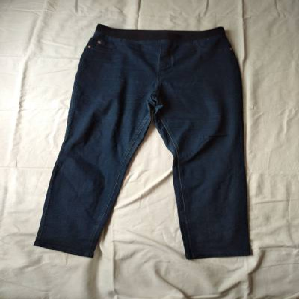

In [54]:
# Path to an image
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'
# Load the image
img = load_img(path, target_size = (input_size, input_size))
# show the image
img

In [55]:
# Convert the image to an array
x = np.array(img)
# Get a batch of one image as array
X = np.array([x])
# Shape of a batch of one image
X.shape

(1, 299, 299, 3)

In [56]:
# Preprocess a batch of one image
X = preprocess_input(X)

# Model's prediction
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [57]:
# Target classes (no need to map, as this list is already sequential)
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

# Target classes with predictions
dict(zip(classes, pred[0]))

{'dress': np.float32(-6.3712807),
 'hat': np.float32(-8.179646),
 'longsleeve': np.float32(-2.9741256),
 'outwear': np.float32(-2.7608786),
 'pants': np.float32(10.792696),
 'shirt': np.float32(-5.9924664),
 'shoes': np.float32(-6.1218576),
 'shorts': np.float32(3.42529),
 'skirt': np.float32(-6.610011),
 't-shirt': np.float32(-2.9237025)}

The higher score is the one of `pants`: the model prediction is correct.

## 8.13 Summary

* We can use pre-trained models for general image classification
* Convolutional layers let us turn an image into a vector
* Dense layers use the vector to make the predictions
* Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
* First, train a small model (150x150) before training a big one (299x299)
* Learning rate - how fast the model trians. Fast learners aren't always best ones
* We can save the best model using callbacks and checkpointing
* To avoid overfitting, use dropout and augmentation

## 8.14 Explore more

* Add more data, e.g. Zalando, etc (ADD LINKS)
* Albumentations - another way of generating augmentations
* Use PyTorch or MXNet instead of TensorFlow/Keras
* In addition to Xception, there are others architectures - try them 

Other projects:

* cats vs dogs
* Hotdog vs not hotdog
* Category of images



---